# Electronic Sales Analysis 2019 📊👨🏻‍🏫👨🏻‍💻

Most Important Aspects to make **Business Decisions**.

* Month with **Highest** Sales

* City with **Highest** Sales

* Best Time of Day when Sales are **Highest**.

* Group of Products Bought or Ordered **Together**.

* Most Sold Product.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Sales of January Month 📈

In [2]:
data = pd.read_csv('Data/Sales_January_2019.csv')

data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


# List of Files in the Directory 📃

In [3]:
files = [file for file in os.listdir('Data')] # List Comprehension to Get all the Files 
files

['Sales_April_2019.csv',
 'Sales_August_2019.csv',
 'Sales_December_2019.csv',
 'Sales_February_2019.csv',
 'Sales_January_2019.csv',
 'Sales_July_2019.csv',
 'Sales_June_2019.csv',
 'Sales_March_2019.csv',
 'Sales_May_2019.csv',
 'Sales_November_2019.csv',
 'Sales_October_2019.csv',
 'Sales_September_2019.csv']

# Merging Sales Data of 12 Months into a Single File. 📦

In [4]:
Sales_Data_2019 = pd.DataFrame() # Blank Data Frame for Adding Each Months Sales Data.

for file in files :

    data = pd.read_csv('Data/'+file)

    Sales_Data_2019 = pd.concat([Sales_Data_2019,data])

Sales_Data_2019.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


# Data Cleaning 🧹

# Drop Repeated Headers

Due to Merging the Data Set of 12 Months the Headers got Repeated.

In [5]:
Sales_Data_2019[Sales_Data_2019['Order ID'] == 'Order ID'].head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


# Select All Rows Except Rows containing Header Names.

In [6]:
Sales_Data_2019 = Sales_Data_2019[Sales_Data_2019['Order ID'] != 'Order ID']

# Physical Information of Data Set

In [7]:
Sales_Data_2019.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186495 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185950 non-null  object
 1   Product           185950 non-null  object
 2   Quantity Ordered  185950 non-null  object
 3   Price Each        185950 non-null  object
 4   Order Date        185950 non-null  object
 5   Purchase Address  185950 non-null  object
dtypes: object(6)
memory usage: 5.7+ MB


# Number of Missing Data in Each Column | Feature

The Data Set has Missing Values, Total Number of Rows and Total Number of **Non Null Rows** has Difference.

In [8]:
print(f'Number of Rows with Missing Data :\n{Sales_Data_2019.isna().sum()}')

Number of Rows with Missing Data :
Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64


# Rows containing NaN

In [9]:
Sales_Data_2019[Sales_Data_2019.isna().any(axis = 1)].head() # axis = 1 : Search for NaN in Each Column

# Entire Row contains NaN, we can Directly Drop those Rows.

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


# Drop Rows Containing NaN

In [10]:
Sales_Data_2019.dropna(inplace = True)

print(f'Is There Any Row Left with NaN ? \n{Sales_Data_2019.isna().sum()}\n')

Sales_Data_2019.info()

Is There Any Row Left with NaN ? 
Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185950 non-null  object
 1   Product           185950 non-null  object
 2   Quantity Ordered  185950 non-null  object
 3   Price Each        185950 non-null  object
 4   Order Date        185950 non-null  object
 5   Purchase Address  185950 non-null  object
dtypes: object(6)
memory usage: 5.7+ MB


In [11]:
Sales_Data_2019.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


# Save Data to CSV

In [12]:
Sales_Data_2019.to_csv('Data/Sales_2019.csv', index = False)

In [13]:
data = pd.read_csv('Data/Sales_2019.csv')

data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


# Add Sales Column

In [14]:
data['Sales'] = data['Quantity Ordered']*data['Price Each']

data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",23.90
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",99.99
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",11.99
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",11.99


# Add Month Column to Calculate Month Sale

In [15]:
data['Month'] = data['Order Date'].str[:2]

data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",23.90,04
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",99.99,04
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00,04
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",11.99,04
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",11.99,04


# What was Best Month for Sale ?

In [16]:
sales = data.groupby('Month')[['Quantity Ordered','Price Each','Sales']].sum()

sales

,Quantity Ordered,Price Each,Sales
Month,,,
01,10903,1.811768e+06,1.822257e+06
02,13449,2.188885e+06,2.202022e+06
03,17005,2.791208e+06,2.807100e+06
04,20558,3.367671e+06,3.390670e+06
05,18667,3.135125e+06,3.152607e+06
06,15253,2.562026e+06,2.577802e+06
07,16072,2.632540e+06,2.647776e+06
08,13448,2.230345e+06,2.244468e+06
09,13109,2.084992e+06,2.097560e+06


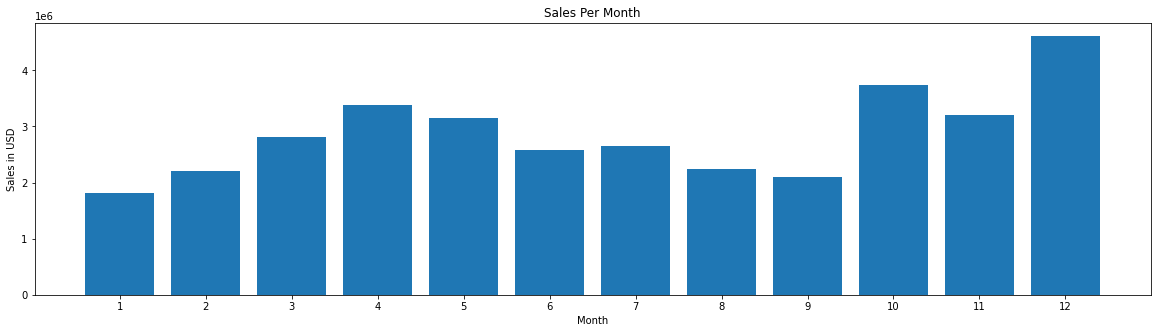

In [17]:
plt.figure(figsize = (20,5))

plt.bar(range(1,13), sales['Sales'])

plt.title('Sales Per Month')

plt.xticks(range(1,13))

plt.xlabel('Month')

plt.ylabel('Sales in USD') ;

# Conclusion :

Sales are **High** during December because of Various Reason.

* Stock Clearance Sales. e.g. Most People Wait for Offers to Buy at **Low Prices** during Clearance Sales. 

* New Year Sale | Offers.

* Christmas Sale | Offers. 

* Christmas Lightings and Celebrations. e.g People Buy more AA | AAA Batteries for Light Decorations.

# Add City Column to Get City with Highest Sale.

In [18]:
# apply() : Apply Function on Each Row items.
data['City'] = data['Purchase Address'].apply(lambda x : f"{x.split(',')[1]} {x.split(',')[2].split(' ')[1]}")

# Two Cities in Different States may have Same Name therefore State should be considered.

# No Need of Entire Address Further
data.drop('Purchase Address',axis = 'columns', inplace = True)

data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Sales,Month,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,23.90,04,Dallas TX
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,99.99,04,Boston MA
2,176560,Google Phone,1,600.00,04/12/19 14:38,600.00,04,Los Angeles CA
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,11.99,04,Los Angeles CA
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,11.99,04,Los Angeles CA


# Which City has the Highest Sale ?

In [19]:
data.groupby('City').sum()[['Quantity Ordered','Price Each','Sales']]

,Quantity Ordered,Price Each,Sales
City,,,
Atlanta GA,16602,2.779908e+06,2.795499e+06
Austin TX,11153,1.809874e+06,1.819582e+06
Boston MA,22528,3.637410e+06,3.661642e+06
Dallas TX,16730,2.752628e+06,2.767975e+06
Los Angeles CA,33289,5.421435e+06,5.452571e+06
New York City NY,27932,4.635371e+06,4.664317e+06
Portland ME,2750,4.471893e+05,4.497583e+05
Portland OR,11303,1.860558e+06,1.870732e+06
San Francisco CA,50239,8.211462e+06,8.262204e+06


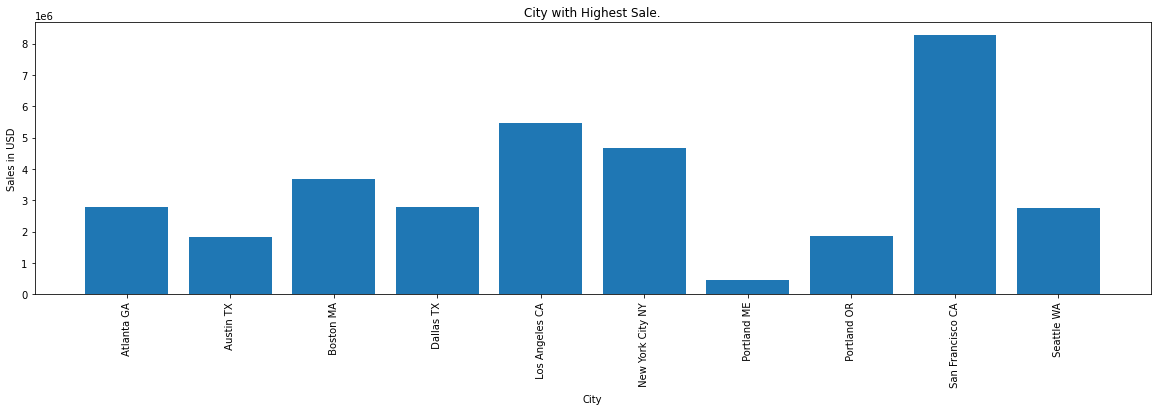

In [20]:
plt.figure(figsize = (20,5))

city = [city for city, df in data.groupby('City')] # Get Same Order of City after Group By.

sales = data.groupby('City').sum()[['Quantity Ordered','Price Each','Sales']]

plt.bar(city, sales['Sales'])

plt.xticks(city, rotation = 'vertical')

plt.title('City with Highest Sale.')

plt.xlabel('City')

plt.ylabel('Sales in USD');

# What Time Should we Display Advertisements to Maximize Likelihood of Customer's Buying Product ?

Hour of Day when Customer visits Shops or Orders more.

In [21]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Sales,Month,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,23.90,04,Dallas TX
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,99.99,04,Boston MA
2,176560,Google Phone,1,600.00,04/12/19 14:38,600.00,04,Los Angeles CA
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,11.99,04,Los Angeles CA
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,11.99,04,Los Angeles CA


# Converting Data Type of Order Date to Datatime 

In [22]:
data['Order Date'] = pd.to_datetime(data['Order Date'])

data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Sales,Month,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,23.90,04,Dallas TX
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,99.99,04,Boston MA
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,600.00,04,Los Angeles CA
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,11.99,04,Los Angeles CA
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,11.99,04,Los Angeles CA


# Create Columns for Hours and Minutes

In [23]:
data['Hour'] = data['Order Date'].dt.hour
data['Minute'] = data['Order Date'].dt.minute

data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Sales,Month,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,23.90,04,Dallas TX,8,46
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,99.99,04,Boston MA,22,30
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,600.00,04,Los Angeles CA,14,38
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,11.99,04,Los Angeles CA,14,38
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,11.99,04,Los Angeles CA,9,27


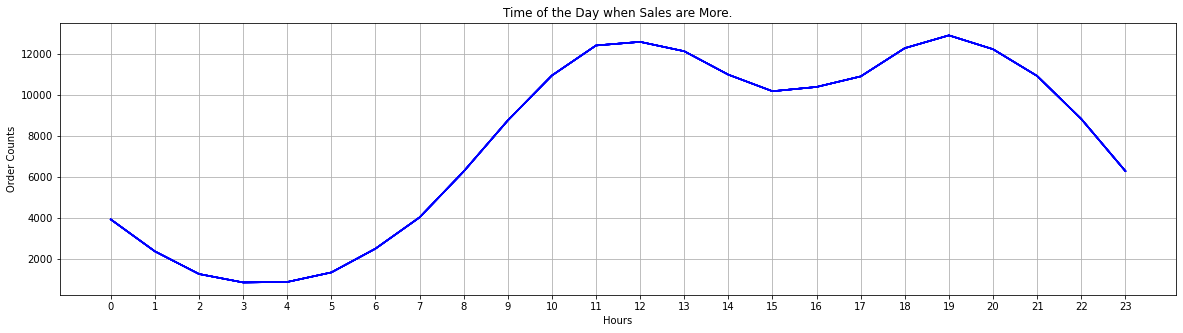

In [24]:
hour = [hr for hr, data in data.groupby('Hour')]

plt.figure(figsize = (20,5))

plt.plot(hour, data.groupby(['Hour']).count(), color = 'b')

plt.xticks(hour)

plt.grid()

plt.title('Time of the Day when Sales are More.')

plt.xlabel('Hours')

plt.ylabel('Order Counts');

# Conclusion :

* Customer Visits Store or Order more between 11a.m. to 1p.m. and 6p.m. to 8.00p.m. 

# What Products are most often Sold together ?

In [25]:
# Create New Data Frame containig only Multiple Products with Same Order ID.
order = data[data['Order ID'].duplicated(keep = False)] 
order.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Sales,Month,City,Hour,Minute
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,600.00,04,Los Angeles CA,14,38
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,11.99,04,Los Angeles CA,14,38
17,176574,Google Phone,1,600.00,2019-04-03 19:42:00,600.00,04,Los Angeles CA,19,42
18,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,11.95,04,Los Angeles CA,19,42
29,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,99.99,04,Boston MA,11,31
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,99.99,04,Boston MA,11,31
31,176586,AAA Batteries (4-pack),2,2.99,2019-04-10 17:00:00,5.98,04,San Francisco CA,17,0
32,176586,Google Phone,1,600.00,2019-04-10 17:00:00,600.00,04,San Francisco CA,17,0
118,176672,Lightning Charging Cable,1,14.95,2019-04-12 11:07:00,14.95,04,New York City NY,11,7
119,176672,USB-C Charging Cable,1,11.95,2019-04-12 11:07:00,11.95,04,New York City NY,11,7


# Creating Group of Products Ordered together 

In [26]:
order['Ordered Together'] = order.groupby('Order ID')['Product'].transform(lambda x : ','.join(x))

order = order[['Order ID','Ordered Together']].drop_duplicates()

order.head(10)

,Order ID,Ordered Together
2,176560,"Google Phone,Wired Headphones"
17,176574,"Google Phone,USB-C Charging Cable"
29,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
31,176586,"AAA Batteries (4-pack),Google Phone"
118,176672,"Lightning Charging Cable,USB-C Charging Cable"
128,176681,"Apple Airpods Headphones,ThinkPad Laptop"
137,176689,"Bose SoundSport Headphones,AAA Batteries (4-pack)"
188,176739,"34in Ultrawide Monitor,Google Phone"
224,176774,"Lightning Charging Cable,USB-C Charging Cable"
232,176781,"iPhone,Lightning Charging Cable"


In [27]:
from itertools import combinations
from collections import Counter 

count = Counter()

for row in order['Ordered Together']:
    items = row.split(',')
    count.update(Counter(combinations(items,2))) # Most Common Pair of Products Bought Together.

for key, value in count.most_common(10): # Top 10 Products Pair Bought Together.
    print(key,value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


# Conclusion :

* Based on the Group of Items Bought Together, **Offers** can be Provided to Attract more Customers.

* e.g. If a Person Buy Iphone, Discount Offers on Lightning Charging Cable.

* Sorting Frequently Bought Products helps to make Better Business Decisions.

# Which Product was Sold Most Frequenctly ? 

In [28]:
product_group = data.groupby('Product')

quantity_ordered = product_group.sum()['Quantity Ordered']

products = [product for product, detail in product_group]

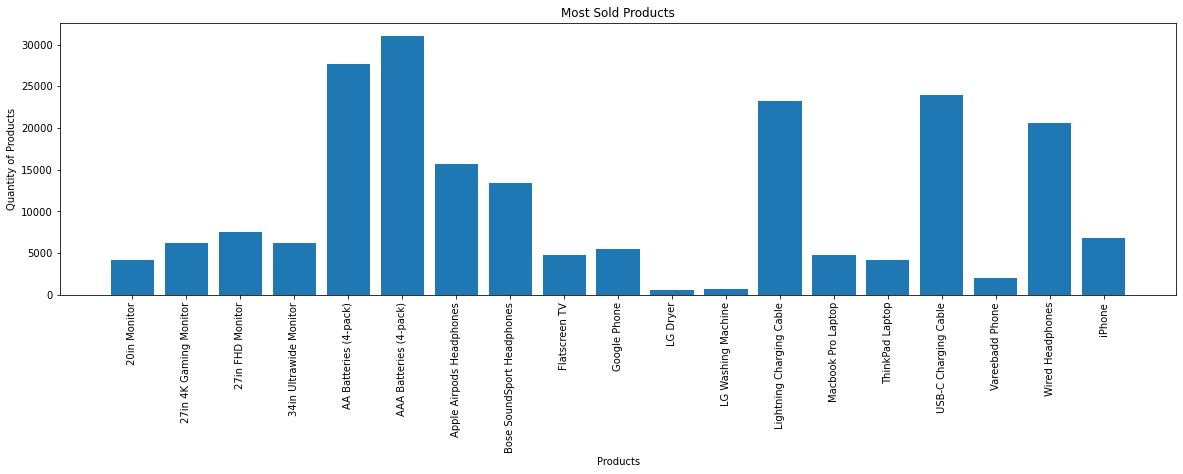

In [29]:
plt.figure(figsize = (20,5))

plt.bar(products, quantity_ordered)

plt.xticks(products, rotation = 'vertical')

plt.title('Most Sold Products')

plt.xlabel('Products')

plt.ylabel('Quantity of Products');

# Conclusion :

* AA and AAA Batteries are Sold most because they are used vey Commonly in Remote, Clock, Toys etc.

* Charging Cables and Headphones are also Important Products for Daily Usage Purpose.

* Price also Matters, Product which are of High Price are not Purchased Regulary.

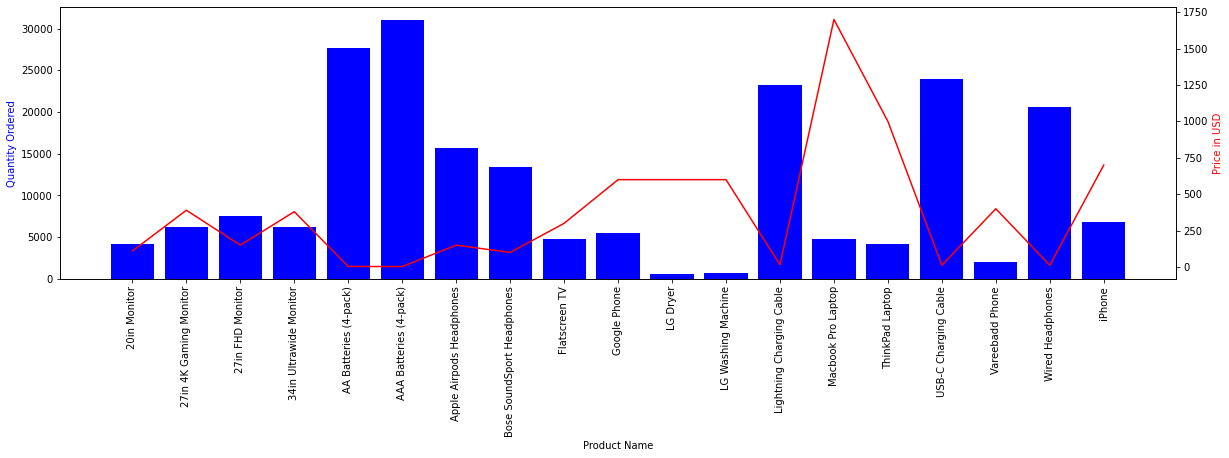

In [30]:
prices = data.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots(figsize = (20,5))

ax2 = ax1.twinx() # Common X Axis

ax1.bar(products, quantity_ordered, color = 'blue')

ax2.plot(products, prices, color = 'red')

ax1.set_xlabel('Product Name')

ax1.set_ylabel('Quantity Ordered', color = 'blue')

ax2.set_ylabel('Price in USD', color = 'red')

ax1.set_xticklabels(products, rotation = 'vertical');

# Conclusion :

* Costly Products have Low Sale, because People dont Buy them Regularly.

* People Mostly Buy **Costly** Products during Festival Sales.